# Introduction

### One Class SVM is used to detect the outliers in the dataset

### Objective:
To find the minimal hyperball containing the positive examples 

So, the optimization problem is the following,
    '$ \min_{R,b,\xi} R^2 + \frac{1}{\nu n} \sum_{i=1}^n \xi_i \quad \text{s.t.} \quad \| \phi(x_i) - b \|^2 \leq R^2 + \xi_i,\,\,\xi_i\geq 0 $'
 -- where $R$ is the radius of the ball, $\xi_i$ the Slack variable of $i$-th point and in the constraint we are requiring all the point to be inside the ball (In the feature space, $\phi(\cdot)$ is the map). Instead of using $C$ as weight of the slack variables we can put $1/\nu n$ where $n$ is the number of examples and $\nu$ a parameter that allows to trade off how many slack we want to admit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 

(300, 2)


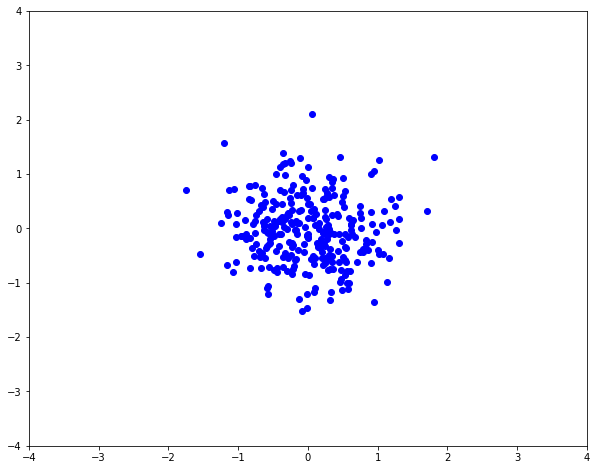

In [2]:
# Generate synthetic data

samples = 300
mean = 0
sig = 0.6

np.random.seed(30)

# generate cluster of points
data = np.zeros((samples,2))
data[:,0] = np.random.normal(mean, sig, samples)
data[:,1] = np.random.normal(mean, sig, samples)

# generate data fo testing
data_test = np.zeros((samples,2))
np.random.seed(24)
data_test[:,0] = np.random.normal(mean, sig, samples)
data_test[:,1] = np.random.normal(mean, sig, samples)


#plot
fig, ax = plt.subplots(figsize = (10,8))
plt.scatter(data[:,0], data[:,1], color='b')
ax.set_ylim([-4,4])
ax.set_xlim([-4,4])
print(data.shape)

In [3]:
# generate optimum nu
# consider all the data within -0.6 to 0.6
inliers = 0
outliers = 0
boundary = 1
nu = 0.05

In [4]:
# Generate the model
model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.05)

model.fit(data)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma=0.05, kernel='rbf',
            max_iter=-1, nu=0.05, shrinking=True, tol=0.001, verbose=False)

##### Plotting the OC-SVM with contours

Recall that the functional form of logistic regression is

$ f(x) = \frac{1}{1+ e^(-(\beta_{0}+\beta_{1} x_{1}+ ... \beta_{k} x_{k}))}$

This is what is returned by predict_proba.The term inside the exponential -->

$d(x)=\beta_{0}+\beta_{1} x_{1}+⋯+\beta_{k} x_{k} $

is what is returned by decision_function.

In [5]:
# let us plot the showcase of the SVM model
def plot_observation(model, ax, sv=True):
    # generate a grid
    xx, yy = np.meshgrid(np.linspace(-4,4,samples),np.linspace(-4,4, samples))
    
    # Decision Function 
    # Evaluates the decision function for the samples in X.
    # np.c_ => is used to concatinate along second axis
    z = model.decision_function(np.c_[xx.ravel(),yy.ravel()])
    z = z.reshape(xx.shape)
    
    # plot the margines => levels = determine the positions of the contour lines
#     ax = plt.contour(xx, yy, z, levels= [0], colors = 'darkred')
#     ax = plt.contour(xx,yy, z,  colors= 'lightblue')
    ax = plt.contour(xx, yy, z,cmap=plt.cm.PuBu)
    
    if sv:
        ax = plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1],
                         s=150,linewidth=1, facecolors='none', edgecolors='black')

In [6]:
y = np.array(((1,2,3),(4,5,6),(7,8,9)))
print(y.flatten())
print(y)
print(y.ravel())
print(y)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


(14,)

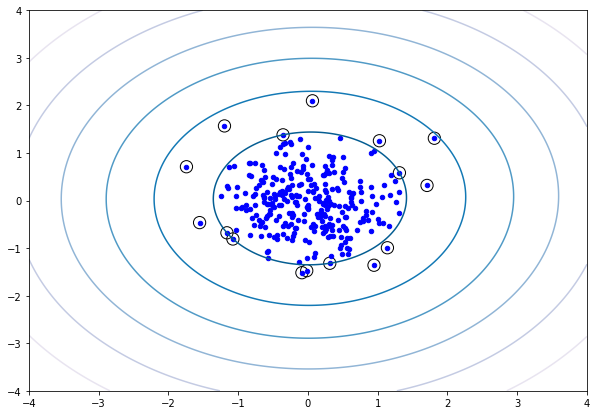

In [7]:
# plot the decision function
fig, ax = plt.subplots(figsize = (10,7))
plot_observation(model, ax, sv=True)

# lets plot the scatter plot
plt.scatter(data[:,0],data[:,1], axes=ax, color='b', s=20)

# error
prediction = model.predict(data)
error = prediction[prediction ==-1].shape
error

#### Increase the weight of the slack variables
Increasing the weight of slack variables i.e. $C => 1/\nu$. But just increasing the weight we have risk of overfitting. Therefore, $\nu$ should be optimum.

0.005


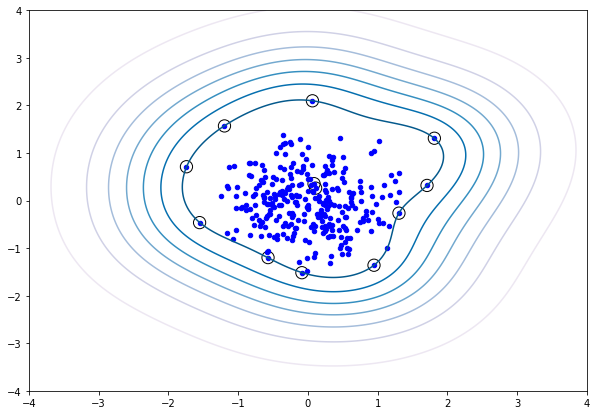

In [8]:
nu = 0.005

print(nu)
model = svm.OneClassSVM(nu=nu, kernel='rbf', gamma=0.55)

model.fit(data)

# plot the model
fig, ax = plt.subplots(figsize= (10,7))
plot_observation(model, ax, sv=True )

#plotting the data samples
plt.scatter(data[:,0], data[:,1], color = 'b', s=20)

In [9]:
# data_train = model.predict(data_test)
predict_nu = model.predict(data)

# the .predict() returns 1 or -1

error = predict_nu[predict_nu== -1].size
error

6

### Introduce Outliers
generate new numbers and call it as outliers

In [28]:
np.random.seed(33030)
out = 10

# generate cluster of points with outliers
new_out = np.zeros((out,2))
new_out = np.random.uniform(low=-3.5, high=3.5, size = (out,2)) 
# new_data[:,1] = np.random.uniform(low=-3.5, high=3.5, size = out)

inn = 30
#generate cluster with inliners
new_in = np.zeros((inn,2))
new_in = np.random.uniform(low=-1, high=1, size = (inn,2))


(-4, 4)

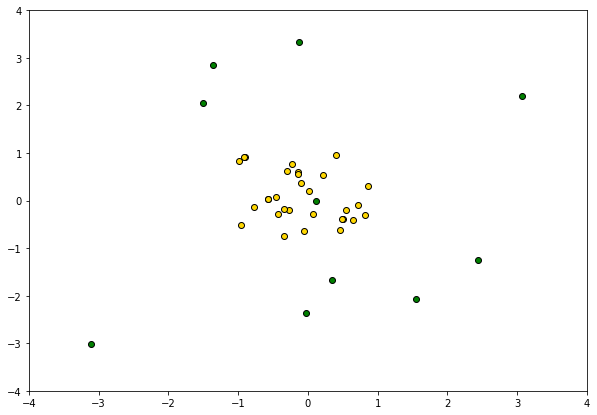

In [32]:
fig, ax = plt.subplots(figsize = (10,7))
plt.scatter(new_out[:,0], new_out[:,1], color='green', edgecolor='black')

plt.scatter(new_in[:,0], new_in[:,1], color='gold', edgecolor='black')

ax.set_ylim([-4,4])
ax.set_xlim([-4,4])



### Scatterplot all the data = data, inliers, outliers

(-4, 4)

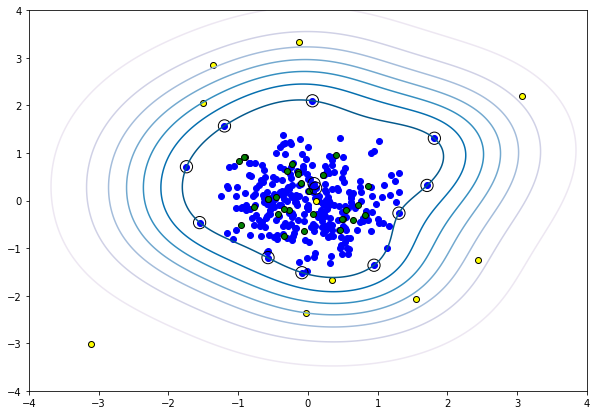

In [35]:
fig, ax = plt.subplots(figsize = (10,7))

# main data
plt.scatter(data[:,0], data[:,1], color='b')

# outliers / inlier
plt.scatter(new_out[:,0], new_out[:,1], color='yellow',edgecolor='black')

plt.scatter(new_in[:,0], new_in[:,1], color='green', edgecolor='black')

plot_observation(model, ax, sv=True)

ax.set_ylim([-4,4])
ax.set_xlim([-4,4])



In [38]:
predict_inliers = model.predict(new_in)
predict_outliers = model.predict(new_out)

error_inliers = predict_inliers[predict_inliers==-1].shape
error_outliers = predict_outliers[predict_outliers==-1].shape

print(error_inliers, error_outliers)

(0,) (9,)
